In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
datetime?

In [4]:
the_date = datetime(2018,1,1)

In [5]:
type(the_date)

datetime.datetime

In [6]:
the_date.hour

0

In [7]:
datetime.now()

datetime.datetime(2018, 4, 17, 17, 51, 41, 352855)

In [8]:
time_ser = [datetime(2018,1,1), datetime(2018,1,2), datetime(2018,2,1)]

In [9]:
time_ser

[datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 2, 0, 0),
 datetime.datetime(2018, 2, 1, 0, 0)]

In [10]:
np.random.seed(10)
data = np.random.rand(3,3)

In [11]:
data

array([[ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084]])

In [12]:
cols = ['Col1', 'Col2', 'Col3']

In [13]:
df = pd.DataFrame(data, index = time_ser, columns=cols)

In [14]:
df

,Col1,Col2,Col3
2018-01-01,0.771321,0.020752,0.633648
2018-01-02,0.748804,0.498507,0.224797
2018-02-01,0.198063,0.760531,0.169111


In [15]:
df

,Col1,Col2,Col3
2018-01-01,0.771321,0.020752,0.633648
2018-01-02,0.748804,0.498507,0.224797
2018-02-01,0.198063,0.760531,0.169111


In [16]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-02-01'], dtype='datetime64[ns]', freq=None)

In [17]:
df = pd.read_csv("stock_1.csv", index_col='Date', parse_dates=True)

In [18]:
df.index.max()

Timestamp('2016-12-30 00:00:00')

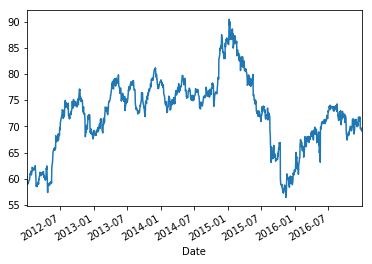

In [19]:
df.Close.plot()

In [20]:
df.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


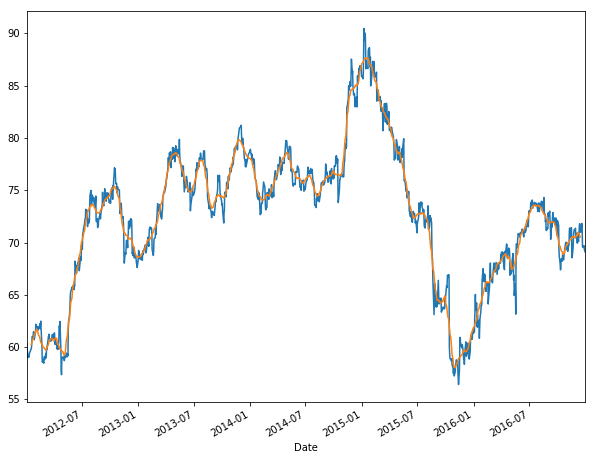

In [21]:
df.Close.plot(figsize=(10,8))
df.rolling(20).mean().Close.shift(-10).plot()

In [22]:
#moving average is shifted. We need to bring it back to its place


In [23]:
df.tshift?

Date
2012-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2013-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2014-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2015-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Close, dtype: object

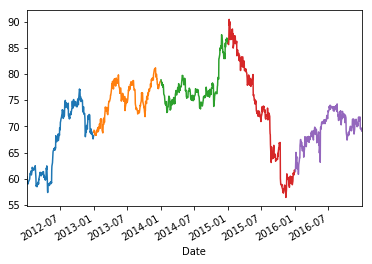

In [24]:
df.resample(rule='A').Close.plot()

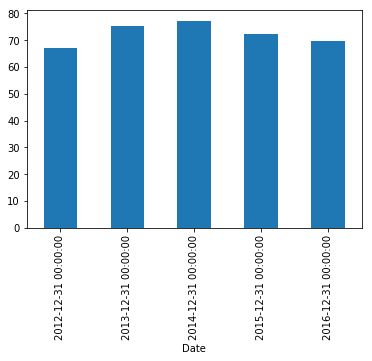

In [25]:
df.resample(rule='A').mean().Close.plot(kind='bar')

In [26]:
import pandas_datareader.data as DRdata

In [27]:
#Apple = DRdata.DataReader('AAPL', 'yahoo', '2015-01-01', '2016-01-01')

In [28]:
import quandl

In [29]:
mydata = quandl.get("FRED/GDP")    #federal reserve data for the GDP

In [30]:
mydata = quandl

In [31]:
start = pd.to_datetime('2012-01-01')

In [32]:
start

Timestamp('2012-01-01 00:00:00')

In [33]:
end = pd.to_datetime('2017-01-01')

In [34]:
stock1 = pd.read_csv('stock1.csv', index_col = 'Date', parse_dates=True)
stock2 = pd.read_csv('stock2.csv', index_col = 'Date', parse_dates=True)
stock3 = pd.read_csv('stock3.csv', index_col = 'Date', parse_dates=True)
stock4 = pd.read_csv('stock4.csv', index_col = 'Date', parse_dates=True)

In [35]:
stock1.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


In [36]:
stock_list = [stock1, stock2, stock3, stock4]

In [37]:
for stock in stock_list:
    stock['NormReturn'] = stock['Adj. Close']/stock['Adj. Close'][0]
    #normalizing the stock price, so that the first day corresponds to 1

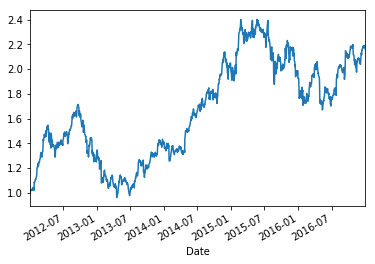

In [38]:
stock1.NormReturn.plot()

In [39]:
alloc_list = [0.3, 0.2, 0.4, 0.1]

In [40]:
for stock, alloc in zip(stock_list, alloc_list):
    stock['Alloced'] = stock.NormReturn * alloc

In [41]:
stock1.head()

,Adj. Close,NormReturn,Alloced
Date,,,
2012-01-03,53.063218,1.000000,0.300000
2012-01-04,53.348386,1.005374,0.301612
2012-01-05,53.940658,1.016536,0.304961
2012-01-06,54.504543,1.027162,0.308149
2012-01-09,54.418089,1.025533,0.307660


In [42]:
init_investment = 1000

In [43]:
for stock in  stock_list:
    stock['value'] = stock['Alloced']*init_investment

In [44]:
stock1.head()

,Adj. Close,NormReturn,Alloced,value
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300.000000
2012-01-04,53.348386,1.005374,0.301612,301.612236
2012-01-05,53.940658,1.016536,0.304961,304.960728
2012-01-06,54.504543,1.027162,0.308149,308.148725
2012-01-09,54.418089,1.025533,0.307660,307.659947


In [45]:
portfolio = pd.concat([stock1.value, stock2.value, stock3.value, stock4.value], axis=1)

In [46]:
portfolio.head()

,value,value,value,value
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980
2012-01-05,304.960728,203.113258,396.478798,99.206837
2012-01-06,308.148725,202.361782,391.926999,101.999665
2012-01-09,307.659947,203.650027,389.887279,99.737474


In [47]:
portfolio.columns = ['Stock1', 'Stock2', 'Stock3', 'Stock4']

In [48]:
portfolio.head()

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980
2012-01-05,304.960728,203.113258,396.478798,99.206837
2012-01-06,308.148725,202.361782,391.926999,101.999665
2012-01-09,307.659947,203.650027,389.887279,99.737474


In [49]:
portfolio['value'] = portfolio.sum(axis=1)
portfolio.head()

,Stock1,Stock2,Stock3,Stock4,value
Date,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980,1002.996174
2012-01-05,304.960728,203.113258,396.478798,99.206837,1003.759620
2012-01-06,308.148725,202.361782,391.926999,101.999665,1004.437171
2012-01-09,307.659947,203.650027,389.887279,99.737474,1000.934727


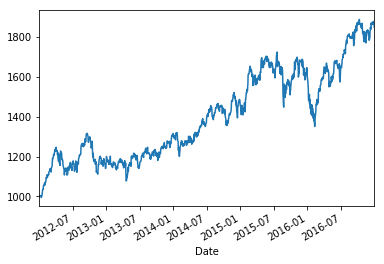

In [50]:
portfolio.value.plot()

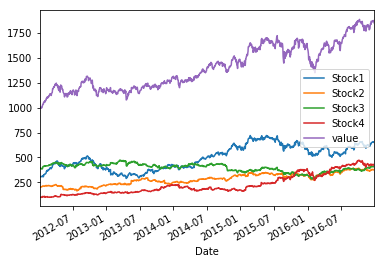

In [51]:
portfolio.plot()

In [52]:
portfolio['Daily Return'] = portfolio['value'].pct_change(1)

In [53]:
portfolio['Daily Return'].mean()

0.0005442330716215314

In [54]:
portfolio['Daily Return'].std()

0.010568287769162557

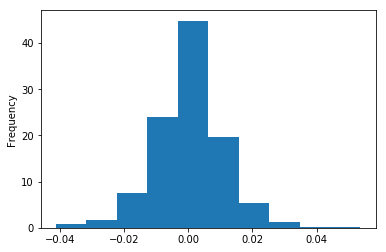

In [55]:
portfolio['Daily Return'].plot(kind='hist', normed=1)

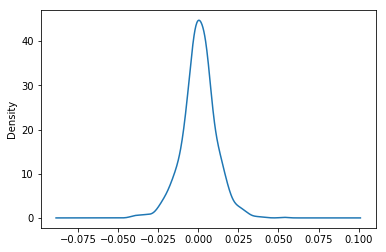

In [56]:
portfolio['Daily Return'].plot(kind='kde')

In [57]:
portfolio_log_ret = np.log(portfolio['value']/portfolio['value'].shift(1))

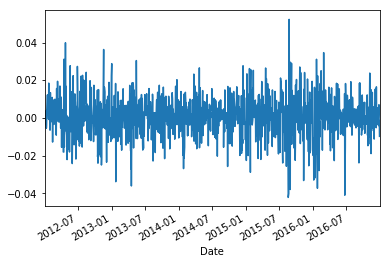

In [58]:
portfolio_log_ret.plot()

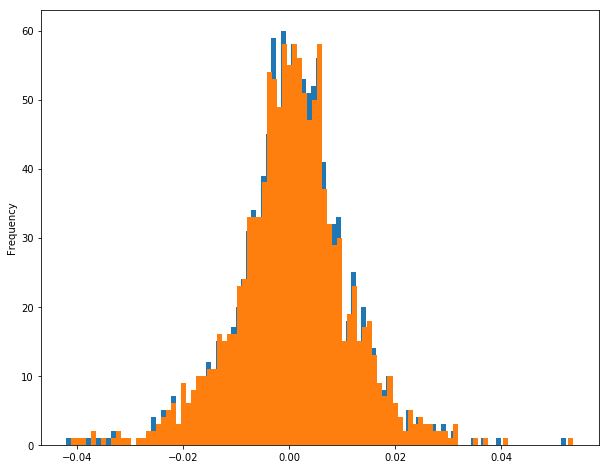

In [59]:
portfolio_log_ret.plot(kind='hist', bins=100, figsize = (10,8))
portfolio['Daily Return'].plot(kind='hist', bins=100, figsize = (10,8))

Sharp_Ratio = Time_value + risk 

 = RF-rate + (r_m - RF-rate)/B

In [60]:
SR = portfolio['Daily Return'].mean()/portfolio['Daily Return'].std()

In [61]:
SR

0.05149680662647749

In [62]:
Ann_SR = SR *np.sqrt(252)

In [63]:
Ann_SR

0.81748646188585505

In [64]:
portfolio.head()

,Stock1,Stock2,Stock3,Stock4,value,Daily Return
Date,,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000,NaN
2012-01-04,301.612236,203.864734,398.368223,99.150980,1002.996174,0.002996
2012-01-05,304.960728,203.113258,396.478798,99.206837,1003.759620,0.000761
2012-01-06,308.148725,202.361782,391.926999,101.999665,1004.437171,0.000675
2012-01-09,307.659947,203.650027,389.887279,99.737474,1000.934727,-0.003487


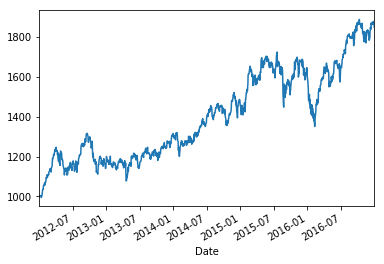

In [65]:
portfolio['value'].plot()

In [66]:
portfolio_log_ret.head()

Date
2012-01-03         NaN
2012-01-04    0.002992
2012-01-05    0.000761
2012-01-06    0.000675
2012-01-09   -0.003493
Name: value, dtype: float64

In [67]:
stock1.head()

,Adj. Close,NormReturn,Alloced,value
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300.000000
2012-01-04,53.348386,1.005374,0.301612,301.612236
2012-01-05,53.940658,1.016536,0.304961,304.960728
2012-01-06,54.504543,1.027162,0.308149,308.148725
2012-01-09,54.418089,1.025533,0.307660,307.659947


In [68]:
stocks = pd.concat([stock1.value, stock2.value, stock3.value, stock4.value], axis=1)

In [69]:
stocks.columns = ['Stock1', 'Stock2', 'Stock3', 'Stock4']

In [70]:
stocks.head()

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000
2012-01-04,301.612236,203.864734,398.368223,99.150980
2012-01-05,304.960728,203.113258,396.478798,99.206837
2012-01-06,308.148725,202.361782,391.926999,101.999665
2012-01-09,307.659947,203.650027,389.887279,99.737474


In [71]:
stocks.corr()

,Stock1,Stock2,Stock3,Stock4
Stock1,1.000000,0.761750,-0.641222,0.622865
Stock2,0.761750,1.000000,-0.594130,0.840519
Stock3,-0.641222,-0.594130,1.000000,-0.635423
Stock4,0.622865,0.840519,-0.635423,1.000000


In [72]:
stocks.cov()

,Stock1,Stock2,Stock3,Stock4
Stock1,14163.268633,5252.903158,-2963.877771,7565.166633
Stock2,5252.903158,3357.453093,-1337.075457,4970.442156
Stock3,-2963.877771,-1337.075457,1508.480220,-2518.692595
Stock4,7565.166633,4970.442156,-2518.692595,10415.617232


Sharp_Ratio = Time_value + risk
= RF-rate + (r_m - RF-rate)/B

In [73]:
SR = np.sqrt(255)*portfolio['Daily Return'].mean()/portfolio['Daily Return'].std()

In [74]:
SR

0.8223380561817798

## Portfolio optimization 

## 1- Monte Carlo simulation

In [75]:
#1- random assignment of weights

#2- Form the portfolio

#3- Get SR

#4- Find weights for which SR is maximized

In [76]:
np.random.seed(10)
weights = np.array(np.random.random(4))

In [77]:
weights = weights/sum(weights)

In [78]:
weights

array([ 0.35470769,  0.00954321,  0.2913962 ,  0.3443529 ])

In [79]:
portfolio.head()

,Stock1,Stock2,Stock3,Stock4,value,Daily Return
Date,,,,,,
2012-01-03,300.000000,200.000000,400.000000,100.000000,1000.000000,NaN
2012-01-04,301.612236,203.864734,398.368223,99.150980,1002.996174,0.002996
2012-01-05,304.960728,203.113258,396.478798,99.206837,1003.759620,0.000761
2012-01-06,308.148725,202.361782,391.926999,101.999665,1004.437171,0.000675
2012-01-09,307.659947,203.650027,389.887279,99.737474,1000.934727,-0.003487


In [80]:
stock1.head()
stock2.head()

,Adj. Close,NormReturn,Alloced,value
Date,,,,
2012-01-03,15.752778,1.000000,0.200000,200.000000
2012-01-04,16.057180,1.019324,0.203865,203.864734
2012-01-05,15.997991,1.015566,0.203113,203.113258
2012-01-06,15.938801,1.011809,0.202362,202.361782
2012-01-09,16.040268,1.018250,0.203650,203.650027


In [81]:
normreturns = pd.concat([stock1.NormReturn, stock2.NormReturn, stock3.NormReturn, stock4.NormReturn], axis=1)

In [82]:
normreturns.head()
normreturns

,NormReturn,NormReturn,NormReturn,NormReturn
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,1.019324,0.995921,0.991510
2012-01-05,1.016536,1.015566,0.991197,0.992068
2012-01-06,1.027162,1.011809,0.979817,1.019997
2012-01-09,1.025533,1.018250,0.974718,0.997375
2012-01-10,1.029205,1.010735,0.973215,1.001732
2012-01-11,1.027527,1.023618,0.978637,0.999274
2012-01-12,1.024706,1.027912,0.969136,0.982684
2012-01-13,1.020864,1.023081,0.961675,0.996593


In [83]:
log_ret = np.log(stocks/stocks.shift(1))

In [84]:
log_ret*weights

,Stock1,Stock2,Stock3,Stock4
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.001901,0.000183,-0.001191,-0.002936
2012-01-05,0.003916,-0.000035,-0.001385,0.000194
2012-01-06,0.003689,-0.000035,-0.003365,0.009560
2012-01-09,-0.000563,0.000061,-0.001520,-0.007723
2012-01-10,0.001268,-0.000071,-0.000450,0.001501
2012-01-11,-0.000579,0.000121,0.001619,-0.000846
2012-01-12,-0.000975,0.000040,-0.002843,-0.005765
2012-01-13,-0.001332,-0.000045,-0.002252,0.004840


In [85]:
exp_ret = np.sum(log_ret.mean()*weights)*252
exp_ret

0.15579987907814905

In [86]:
exp_vol = np.sqrt( np.dot( weights.T, np.dot(log_ret.cov() * 252, weights)))

In [87]:
exp_vol

0.18376874265583956

In [88]:
exp_ret_list = []
exp_vol_list = []
w1_list = []
w2_list = []
w3_list = []
w4_list = []
SR_list = []

num_sim = 10000
#for w1 in np.arange(0,1,0.1):
 #   for w2 in np.arange(0,1 - w1,0.1):
  #      for w3 in np.arange(0,1 - w2 - w3,0.1):
   #         for w4 in np.arange(0,1,0.1):
num_sim_vec = np.arange(1,num_sim,1)   
    
for ind in num_sim_vec:
    weights = np.array(np.random.random(4))
    weights = weights/sum(weights)
    exp_ret = np.sum(log_ret.mean()*weights*252)
    exp_vol = np.sqrt( np.dot( weights.T, np.dot(log_ret.cov() * 252, weights)))
    SR = exp_ret/exp_vol
    w1_list.append(weights[0])
    w2_list.append(weights[1])
    w3_list.append(weights[2])
    w4_list.append(weights[3])
    exp_ret_list.append(exp_ret)
    exp_vol_list.append(exp_vol)
    SR_list.append(SR)          

In [89]:
max(SR_list[1:])

1.0294578005633588

In [90]:
i = SR_list.index(max(SR_list[1:]))
print(i)

6389


In [91]:
w1_list[i], w2_list[i], w3_list[i], w4_list[i]

w_max = [w1_list[i], w2_list[i], w3_list[i], w4_list[i]]
w_max

[0.23136104638250982,
 0.21906222079741472,
 0.0006337411514834542,
 0.54894299166859195]

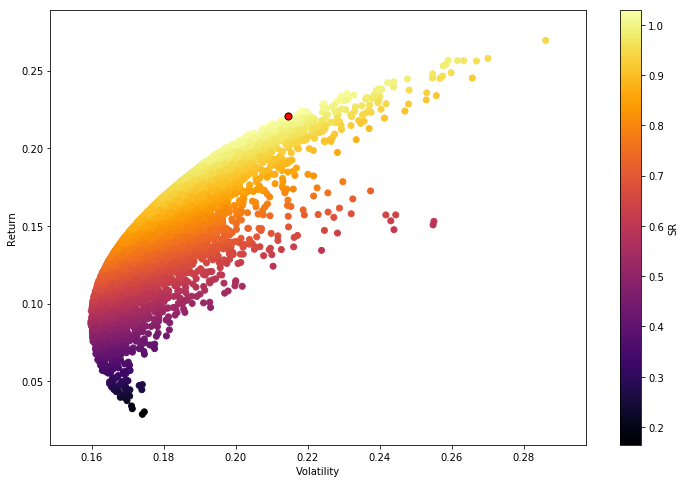

In [92]:
plt.figure(figsize =(12,8))
plt.scatter(exp_vol_list, exp_ret_list, c=SR_list, cmap='inferno')
plt.colorbar(label='SR')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(exp_vol_list[i], exp_ret_list[i], c='red', s=50, edgecolors = 'black')
plt.show()

In [93]:
from scipy.optimize import minimize

In [94]:
def get_sharp_ratio(weights):
    weights = np.array(weights)
    exp_ret = np.sum(log_ret.mean()*weights*252)
    exp_vol = np.sqrt( np.dot( weights.T, np.dot(log_ret.cov() * 252, weights)))
    SR = exp_ret/exp_vol
    return SR

In [95]:
def min_SR(weights):
    return get_sharp_ratio(weights)*(-1)

In [96]:
min_SR([1,0,0,0])

-0.59222660916432301

In [97]:
weights_0 = [0.25, 0.25, 0.25, 0.25]
sum(weights_0)

1.0

In [98]:
minimize(min_SR, weights_0)

      fun: -1.1194046846962202
 hess_inv: array([[ 1.24437566, -0.19559749, -0.09122213, -0.04008723],
       [-0.19559749,  1.81542907, -0.49668052, -0.15219354],
       [-0.09122213, -0.49668052,  1.67295563,  0.11530067],
       [-0.04008723, -0.15219354,  0.11530067,  0.93348191]])
      jac: array([  7.45058060e-08,  -3.12924385e-07,  -7.74860382e-07,
        -5.81145287e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 0.40101299,  0.43366548, -0.66110944,  0.69293569])

In [99]:
minimize?

In [100]:
sum(weights_0)

1.0

In [101]:
import numpy as np

d = {"type":"eq", "fun": lambda x: (np.sum(x)-1)}
d

{'fun': <function __main__.<lambda>>, 'type': 'eq'}

In [102]:
bounds = ((0,1), (0,1), (0,1), (0,1))

In [103]:
minimize(min_SR, weights_0, constraints=d, bounds=bounds)

     fun: -1.0307168703371898
     jac: array([  5.64008951e-05,   4.18126583e-05,   3.39921698e-01,
        -4.44799662e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.26628976,  0.20418981,  0.        ,  0.52952043])

In [106]:
Results2 = minimize(min_SR, weights_0, constraints=d,bounds=bounds)

In [107]:
Results2.x

array([ 0.26628976,  0.20418981,  0.        ,  0.52952043])

In [109]:
get_sharp_ratio(Results2.x)

1.0307168703371898

# Efficiency Frontier

In [112]:
front_vol = np.linspace(0.15,0.3, 50)

In [113]:
front_vol

array([ 0.15      ,  0.15306122,  0.15612245,  0.15918367,  0.1622449 ,
        0.16530612,  0.16836735,  0.17142857,  0.1744898 ,  0.17755102,
        0.18061224,  0.18367347,  0.18673469,  0.18979592,  0.19285714,
        0.19591837,  0.19897959,  0.20204082,  0.20510204,  0.20816327,
        0.21122449,  0.21428571,  0.21734694,  0.22040816,  0.22346939,
        0.22653061,  0.22959184,  0.23265306,  0.23571429,  0.23877551,
        0.24183673,  0.24489796,  0.24795918,  0.25102041,  0.25408163,
        0.25714286,  0.26020408,  0.26326531,  0.26632653,  0.26938776,
        0.27244898,  0.2755102 ,  0.27857143,  0.28163265,  0.28469388,
        0.2877551 ,  0.29081633,  0.29387755,  0.29693878,  0.3       ])

In [114]:
def get_ret_vol_SR(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights*252)
    vol = np.sqrt( np.dot( weights.T, np.dot(log_ret.cov() * 252, weights)))
    SR = ret/vol
    return ret, vol, SR

In [128]:
def max_ret(weights):
    return get_ret_vol_SR(weights)[0]*(-1)

def min_vol(weights):
    return get_ret_vol_SR(weights)[1]

In [125]:
front_ret = []


bounds = ((0,1), (0,1), (0,1), (0,1))

for vol in front_vol:
    cons = ({"type":"eq", "fun": lambda x: (np.sum(x)-1)}, 
       {"type":"eq", "fun": lambda x: get_ret_vol_SR (x)[0] - ret})
    
    result = minimize(max_ret, weights_0, bounds=bounds, constraints=cons)
    
    front_ret.append(result['fun']*(-1))
    
   # minimize(min_SR, weights_0, constraints=d, bounds=bounds)

In [126]:
front_ret

[0.0882226763729923,
 0.0882226315488492,
 0.08822258061887074,
 0.08822253791544077,
 0.11655239333247935,
 0.13008782535471913,
 0.1403821855881974,
 0.14910137719118904,
 0.1568497828338183,
 0.16392583977236605,
 0.17050084122208653,
 0.1766897904194998,
 0.18256681100371885,
 0.18818773958352075,
 0.19359332241064395,
 0.19867890699839502,
 0.20315571734807375,
 0.20719743867096063,
 0.21092393662494463,
 0.21440925457819865,
 0.2177026704522797,
 0.22083970291074945,
 0.22384596079480443,
 0.22674110927935945,
 0.22954053344650818,
 0.23225651089415514,
 0.23489902130116935,
 0.23747630608404657,
 0.23999525201481942,
 0.2424616836721499,
 0.24488057554952022,
 0.24725621778148968,
 0.24959233107473988,
 0.2518921701468141,
 0.25415859901247895,
 0.25639415241784513,
 0.258595201404863,
 0.26073491668491794,
 0.2628160560614399,
 0.26484498686371255,
 0.26682701433581446,
 0.2687666655186078,
 0.27066781910678916,
 0.27253383253499125,
 0.27436763167789735,
 0.27617178015912486,


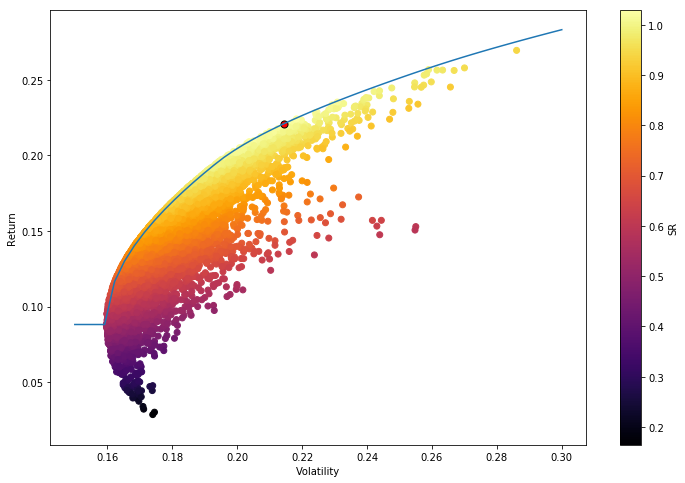

In [127]:
plt.figure(figsize =(12,8))
plt.scatter(exp_vol_list, exp_ret_list, c=SR_list, cmap='inferno')
plt.colorbar(label='SR')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(exp_vol_list[i], exp_ret_list[i], c='red', s=50, edgecolors = 'black')
plt.plot(front_vol, front_ret)
plt.show()

In [137]:
front_vol2 = []

front_ret2 = np.linspace(0.05,0.28, 50)

bounds = ((0,1), (0,1), (0,1), (0,1))

for ret in front_ret2:
    cons = ({"type":"eq", "fun": lambda x: (np.sum(x)-1)}, 
       {"type":"eq", "fun": lambda x: get_ret_vol_SR (x)[0] - ret})
    
    result = minimize(min_vol, weights_0, bounds=bounds, constraints=cons)
    
    front_vol2.append(result['fun'])
    
   # minimize(min_SR, weights_0, constraints=d, bounds=bounds

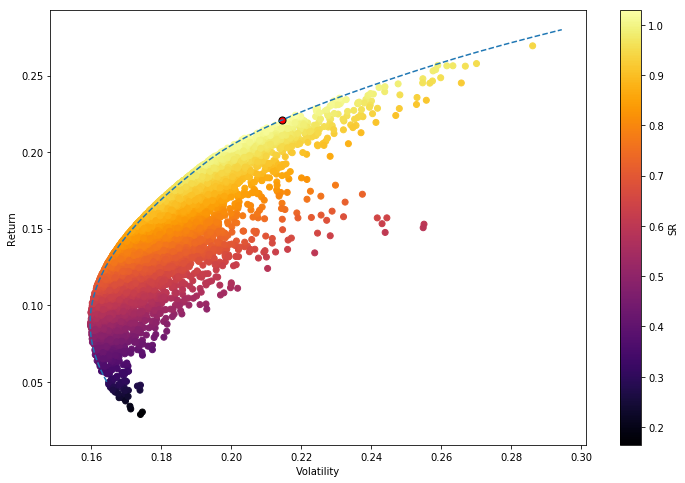

In [138]:
plt.figure(figsize =(12,8))
plt.scatter(exp_vol_list, exp_ret_list, c=SR_list, cmap='inferno')
plt.colorbar(label='SR')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(exp_vol_list[i], exp_ret_list[i], c='red', s=50, edgecolors = 'black')
plt.plot(front_vol2, front_ret2, '--')
plt.show()